In [48]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab
import imageio
from matplotlib.pyplot import imread
import cv2
import PIL
import time

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

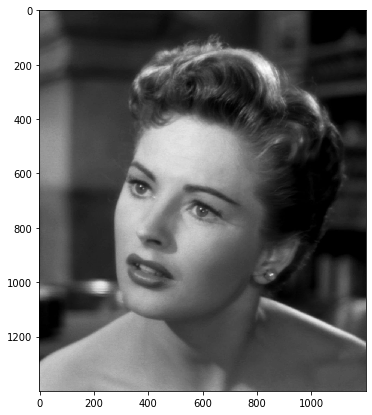

In [49]:
im = plt.imread("1200px-Coleen_Gray_in_Kansas_City_Confidential.jpg")
f = plt.figure()
plt.imshow(im, cmap = 'gray')

In [50]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [51]:
def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [52]:
start_time = time.time()
imsize = im.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i + 8), j:(j + 8)] = dct2(im[i:(i + 8), j:(j + 8)])

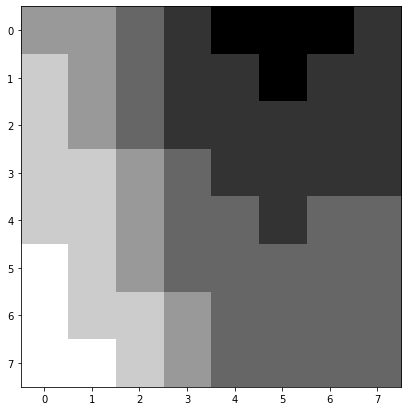

In [53]:
pos = 128 

plt.figure()
plt.imshow(im[pos: pos + 8, pos: pos + 8], cmap = 'gray')


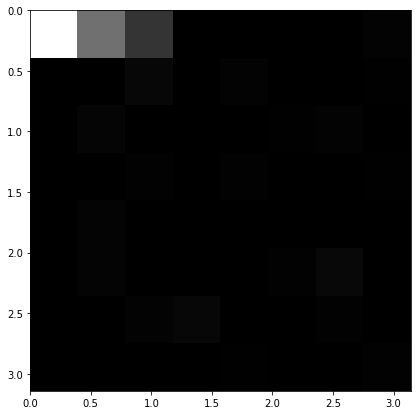

In [54]:
plt.figure()
plt.imshow(dct[pos:pos + 8, pos:pos + 8], cmap = 'gray', vmax = np.max(dct)*0.01, vmin = 0, extent = [0, pi, pi, 0])

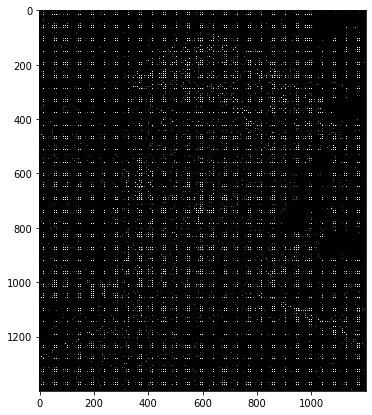

In [55]:
plt.figure()
plt.imshow(dct, cmap = 'gray',vmax = np.max(dct) * 0.01, vmin = 0)

0.017223214285714286


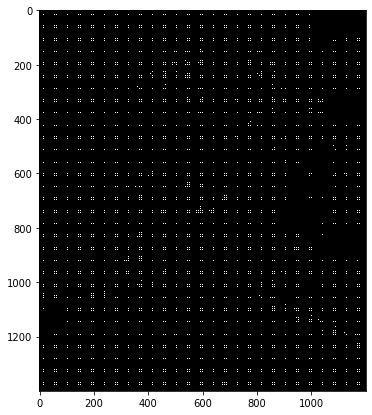

In [56]:
thresh = 0.02
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))

plt.figure()
plt.imshow(dct_thresh, cmap = 'gray', vmax = np.max(dct)*0.01, vmin = 0)

percent_nonzeros = np.sum(dct_thresh != 0.0) / (imsize[0] * imsize[1]*1.0)

print(percent_nonzeros)

2.981023073196411


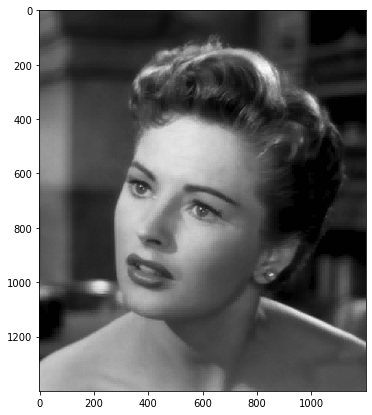

In [57]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8), j:(j+8)] )
        
        
plt.figure()
plt.imshow(im_dct, cmap = 'gray')
print(time.time() - start_time)

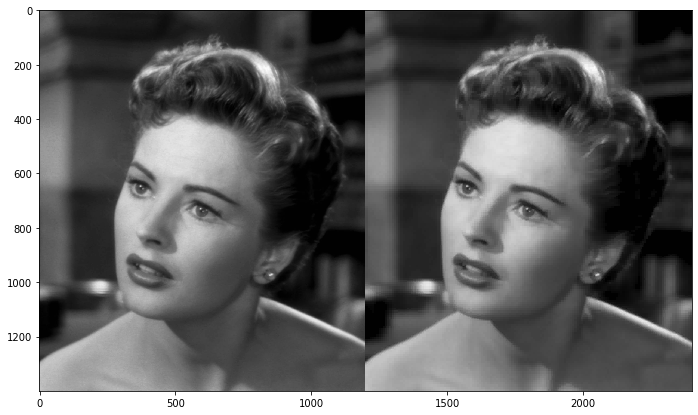

In [58]:
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')

In [59]:
cv2.imwrite('DCT_image.jpg',im_dct)

True

In [60]:
abs(dct)

array([[8.49750000e+02, 8.22963553e+00, 3.26640741e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.99072488e+01, 4.67811041e+00, 6.15000040e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.42439269e+00, 4.25793145e-02, 2.28553391e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.60474323e-01, 1.25000000e-01, 4.30019964e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00610811e-01, 3.06079273e-01, 4.26776695e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.58417820e-01, 9.56708581e-02, 4.34910668e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [61]:
abs(dct) > (thresh*np.max(dct))

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [62]:
thresh*np.max(dct)

36.925000000000004

In [63]:
dct_thresh

array([[849.75,  -0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,  -0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ -0.  ,  -0.  ,  -0.  , ...,   0.  ,   0.  ,   0.  ],
       [ -0.  ,  -0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,  -0.  ,  -0.  , ...,   0.  ,   0.  ,   0.  ]])

In [64]:
idct2(dct_thresh)

array([[10367.12494086, -2575.09342397, -1200.57225213, ...,
        -1228.70382053, -2554.00113739, 10401.21497957],
       [-5494.49085975,   849.41038702,  1850.07048572, ...,
         1851.43262301,   823.48798012, -5516.22310932],
       [  626.95533537,   -35.72618946,  1441.63776409, ...,
         1450.33461986,   -24.76141628,   619.90883349],
       ...,
       [  652.62546256,   -31.40564632,  1454.36017699, ...,
         1466.88253474,   -23.22530519,   646.11408105],
       [-5509.46645555,   834.89254725,  1842.75319248, ...,
         1844.69834441,   809.36733427, -5532.94818146],
       [10401.99555235, -2585.10996322, -1225.63349885, ...,
        -1250.47834894, -2565.72178854, 10436.32551483]])

In [65]:
a = [1, 2, 3, 4]

In [66]:
a

[1, 2, 3, 4]

In [67]:
a_dct = scipy.fft.dct(a, axis=0, norm='ortho')

In [68]:
a_dct

array([ 5.        , -2.2304425 ,  0.        , -0.15851267])

In [69]:
a_idct = scipy.fft.dct(a_dct, axis = 0, norm ='ortho')

In [70]:
a_idct

array([1.30552242, 2.76640741, 3.53596491, 2.85299025])